<a href="https://colab.research.google.com/github/gemp2/my-project-as-a-beginner/blob/main/NIO_stock_price_prediction_with_ML_(Prophet_algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data = pd.read_csv("/content/NIO.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-13,2.67,2.97,2.63,2.97,2.97,38421700
1,2020-04-14,3.15,3.16,2.92,3.01,3.01,36479000
2,2020-04-15,2.95,3.20,2.88,3.20,3.20,27529800
3,2020-04-16,3.30,3.41,3.20,3.25,3.25,37801700
4,2020-04-17,3.36,3.36,3.15,3.21,3.21,22831800


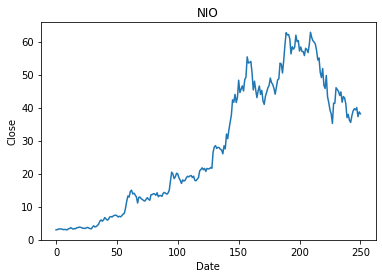

In [6]:
close = data['Close']
ax = close.plot(title='NIO')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [8]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

data = data.rename(columns={"Date" : "ds", "Close" : "y" })

model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
611,2022-04-05,-63.759882,-126.537989,-4.985461
612,2022-04-06,-64.108655,-126.762892,-4.575288
613,2022-04-07,-64.397353,-127.354128,-5.423229
614,2022-04-08,-64.676389,-127.262598,-5.715127
615,2022-04-09,-63.519865,-127.375107,-4.574829


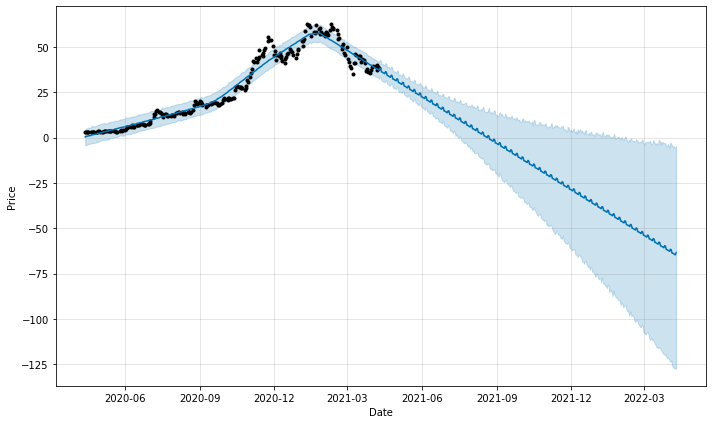

In [9]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")